# Project Overview

As part of the Udacity Artifical Intelligence Nano Degree, we are asked to complete a project that involves implementing and analyzing the performance of Seach-based Planning Stratgies.   Our lessons and text book covered uninformed search strategies like breath-first seach (BFS), depth-first search (DFS), and uniform cost search (UCS) and informed search stratgies that use heuristics like best-first search and A* search (A*).

In this project we have implemented code for creating graphs that present the problem and mutual exclusive criteria used to make a planning graph.   

Our problem is a logisitic problem where we have a set of planes, airports and cargos, and we need to get the cargo to the correct airport.

## Problem 1

Our first problem has the following descriptions and goals:

```
Init(At(C1, SFO) ∧ At(C2, JFK) 
    ∧ At(P1, SFO) ∧ At(P2, JFK) 
    ∧ Cargo(C1) ∧ Cargo(C2) 
    ∧ Plane(P1) ∧ Plane(P2)
    ∧ Airport(JFK) ∧ Airport(SFO))
Goal(At(C1, JFK) ∧ At(C2, SFO))
```

The Optimal Plan for this problem is some permutation of:

```
Load(C1, P1, SFO)
Load(C2, P2, JFK)
Fly(P2, JFK, SFO)
Unload(C2, P2, SFO)
Fly(P1, SFO, JFK)
Unload(C1, P1, JFK)
```

## Problem 2

Our first problem has the following descriptions and goals:

```
Init(At(C1, SFO) ∧ At(C2, JFK) ∧ At(C3, ATL) 
    ∧ At(P1, SFO) ∧ At(P2, JFK) ∧ At(P3, ATL) 
    ∧ Cargo(C1) ∧ Cargo(C2) ∧ Cargo(C3)
    ∧ Plane(P1) ∧ Plane(P2) ∧ Plane(P3)
    ∧ Airport(JFK) ∧ Airport(SFO) ∧ Airport(ATL))
Goal(At(C1, JFK) ∧ At(C2, SFO) ∧ At(C3, SFO))
```

The Optimal Plan for this problem is some permutation of:

```
Load(C1, P1, SFO)
Load(C2, P2, JFK)
Load(C3, P3, ATL)
Fly(P2, JFK, SFO)
Unload(C2, P2, SFO)
Fly(P1, SFO, JFK)
Unload(C1, P1, JFK)
Fly(P3, ATL, SFO)
Unload(C3, P3, SFO)
```

## Problem 3

Our first problem has the following descriptions and goals:

```
Init(At(C1, SFO) ∧ At(C2, JFK) ∧ At(C3, ATL) ∧ At(C4, ORD) 
    ∧ At(P1, SFO) ∧ At(P2, JFK) 
    ∧ Cargo(C1) ∧ Cargo(C2) ∧ Cargo(C3) ∧ Cargo(C4)
    ∧ Plane(P1) ∧ Plane(P2)
    ∧ Airport(JFK) ∧ Airport(SFO) ∧ Airport(ATL) ∧ Airport(ORD))
Goal(At(C1, JFK) ∧ At(C3, JFK) ∧ At(C2, SFO) ∧ At(C4, SFO))
```

The Optimal Plan for this problem is some pertubation of:

```
Load(C1, P1, SFO)
Fly(P1, SFO, ATL)
Load(C3, P1, ATL)
Fly(P1, ATL, JFK)
Unload(C1, P1, JFK)
Unload(C3, P1, JFK)
Load(C2, P2, JFK)
Fly(P2, JFK, ORD)
Load(C4, P2, ORD)
Fly(P2, ORD, SFO)
Unload(C2, P2, SFO)
Unload(C4, P2, SFO)
```

# Search Evaluations

The are 4 ways to evaluate search as described in Artifical Intelligence: A Modern Approach by Russel and Norvig.

1.  Completeness: A solution will be found
2.  Time Complexity:  How the time grow to find a solution.
3.  Space Complexity:  How the memory needs grow to find a solution.
4.  Optimal: The optimal solution will be found.

We will be reviewing the results of our soltions in terms of these 3 of these 4 metrics.  Completeness will not be considered.  Time complexity will be evaluated by the time it takes the algorithm to run.  Space Complexity will be evaluated by the number of nodes explored and evaluated.  Optimal will be evaluated by the solution that is returned.  

# Non-Heuristic Planning

We were ask to run the search for a plan that solved our three problems using three uniformed search strategies.   I opted to us breath-first search, depth-first search graph (to avoid loops), and uniform cost search.   The results of the search are shown in the table below

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
results = pd.read_csv(
    "Search Performance on Cargo Plain Problem - Sheet1.csv"
)
results\
    .query("Algorithm in ('breadth_first_search',"+\
        "'depth_first_graph_search','uniform_cost_search')")

,Problem,Algorithm,Expansion,Goals,New_Nodes,Time,Optimal
0,Problem 1,breadth_first_search,43,56,180,0.02450,True
1,Problem 1,depth_first_graph_search,21,22,85,0.01270,False
2,Problem 1,uniform_cost_search,55,57,224,0.03617,True
6,Problem 2,breadth_first_search,3343,4609,30509,12.76000,True
7,Problem 2,depth_first_graph_search,624,625,5602,3.50000,False
8,Problem 2,uniform_cost_search,4840,4842,43918,44.33000,True
12,Problem 3,breadth_first_search,14663,18098,129631,96.69000,True
13,Problem 3,depth_first_graph_search,408,409,3364,1.73000,False
14,Problem 3,uniform_cost_search,16963,16965,149136,370.32000,True


By these metrics, depth-first graph search has the best time and space metrics in that it produces a solution with the least nodes explored and fastest time.   The solution, however, is far from optimal.

The depth of the optimal solutions for problems 1, 2, and 3 are 6, 9, and 12.  The plan length provided by depth-first search for these problems is 20, 619, and 392.   There is a clear trade off between finding the optimal solution and a finding a solution.

# Heuristic Planning

In this section we are asked to us A* search with a number of heuristics.

1.  Cost of 1 (Same as Uniform Cost)
2.  Number of Steps ignoring preconditions
3.  Level Sum using a Planning Graph.

## Problem 1 Results

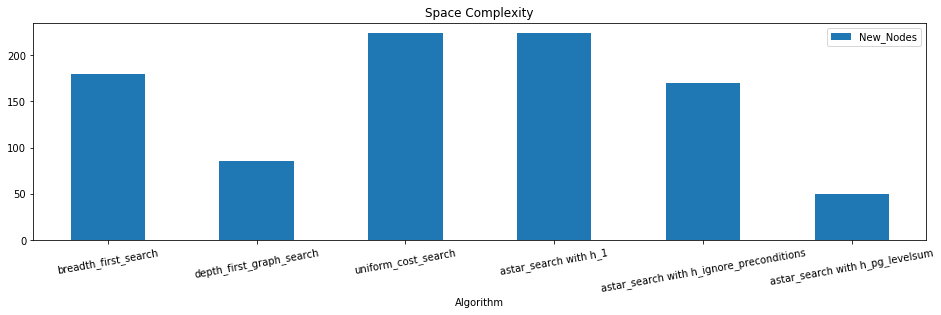

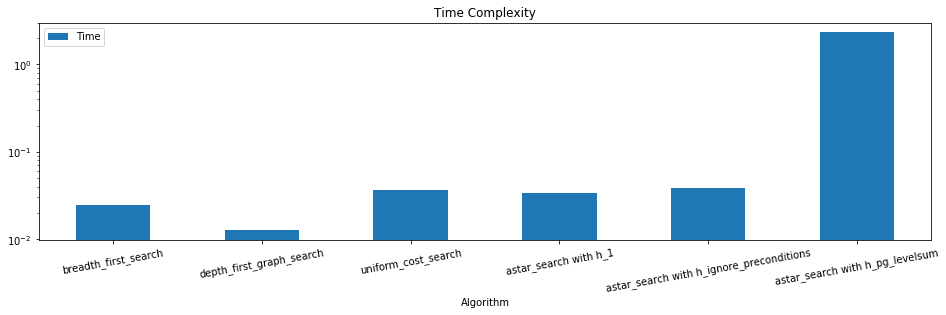

In [2]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,4))
axes.set_title("Space Complexity")
results.query("Problem == 'Problem 1'")[['Algorithm','New_Nodes']]\
    .plot.bar(x='Algorithm',y='New_Nodes', ax=axes)
axes.set_xticklabels(axes.xaxis.get_majorticklabels(), rotation=10)
plt.show()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,4))
axes.set_title("Time Complexity")
results.query("Problem == 'Problem 1'")[['Algorithm','Time']]\
    .plot.bar(x='Algorithm',y='Time', ax=axes)
axes.set_xticklabels(axes.xaxis.get_majorticklabels(), rotation=10)
axes.set_yscale('log')
plt.show()

For problem 1, the simplest problem, all the algorithms find the optimal plan except for depth first graph search.  The levelsum heuristic has the least space complexity, but also has the largest time requirements.   It is several orders of magnitude slower than the other methods.   

## Problem 2 Results

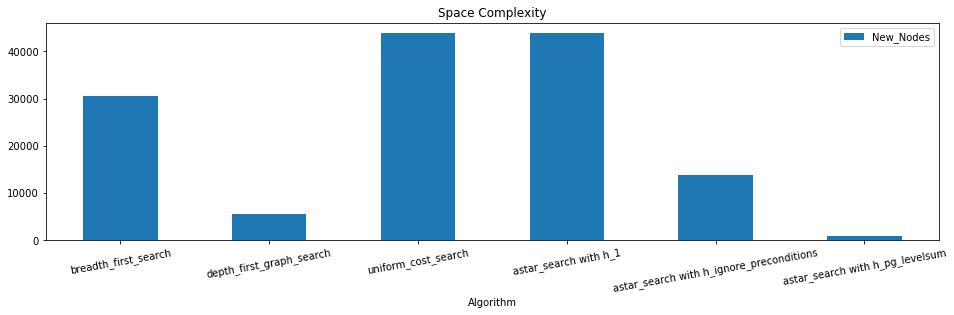

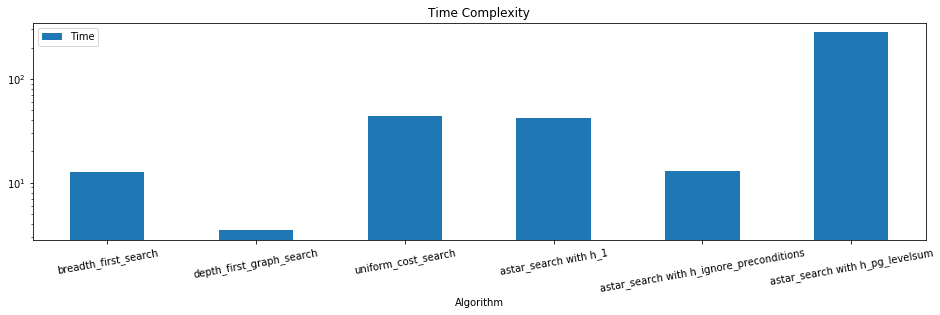

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,4))
axes.set_title("Space Complexity")
results.query("Problem == 'Problem 2'")[['Algorithm','New_Nodes']]\
    .plot.bar(x='Algorithm',y='New_Nodes', ax=axes)
axes.set_xticklabels(axes.xaxis.get_majorticklabels(), rotation=10)
plt.show()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,4))
axes.set_title("Time Complexity")
results.query("Problem == 'Problem 2'")[['Algorithm','Time']]\
    .plot.bar(x='Algorithm',y='Time', ax=axes)
axes.set_xticklabels(axes.xaxis.get_majorticklabels(), rotation=10)
axes.set_yscale('log')
plt.show()

Problem 2 is a more complex problem in the depth of the solution is 9 instead of 6, and the branching factor is larger.  The space complexity benefits from using the planning graph is very noticable here, but the time increase is still order of magnitude longer than the other methods.   The ignore preconditions heuristic seems to be the best balance in time and memory.  It out performs all other methods except depth-first search, but the solution it produces is optimal, while the solution depth-first search produces is far from optimal.

## Problem 3 Results

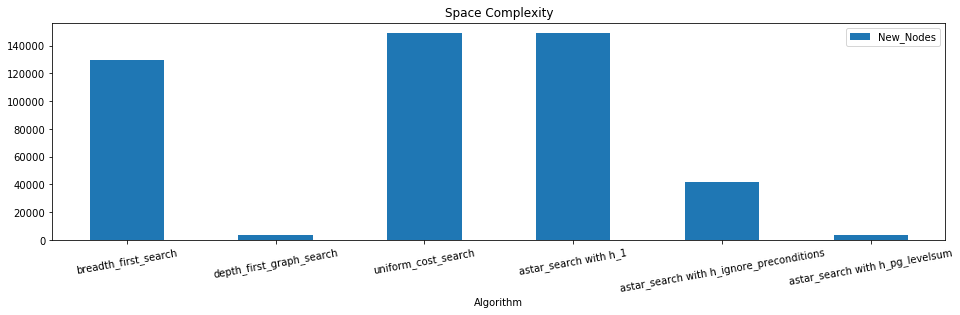

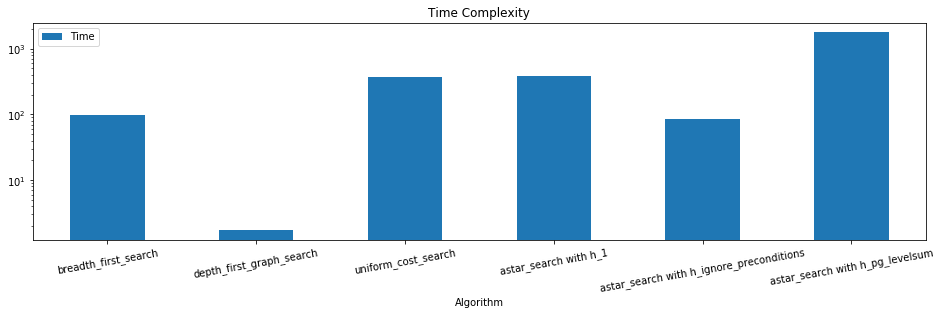

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,4))
axes.set_title("Space Complexity")
results.query("Problem == 'Problem 3'")[['Algorithm','New_Nodes']]\
    .plot.bar(x='Algorithm',y='New_Nodes', ax=axes)
axes.set_xticklabels(axes.xaxis.get_majorticklabels(), rotation=10)
plt.show()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,4))
axes.set_title("Time Complexity")
results.query("Problem == 'Problem 3'")[['Algorithm','Time']]\
    .plot.bar(x='Algorithm',y='Time', ax=axes)
axes.set_xticklabels(axes.xaxis.get_majorticklabels(), rotation=10)
axes.set_yscale('log')
plt.show()

Problem 3 is the most complex problem of the three because its solution is at a depth of 12, and it has a larger branching factor.   All the statements about problem 2 carry over to problem 3.  

# Summary

The best heuristic depends on the use case, but it is a clear that heuristics can improve the use of memory, time, or both in trying to search for an optimal plan.   Depending on the complexity of the problem, and the limit on computational resources, different heuristics could be used.   Ignoring preconditions seems to be a good balance in that it generates optimal plans while improving the space complexity over uniformed, optimal search methods.  If the size of the problem is very large where memory constraints will be reached, the planning graph level sum heuristics, while being slower, has a significant space complexity benefit that would be useful.   

